In [646]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats 
import matplotlib.pyplot as plt
import hvplot.pandas

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, 
    roc_auc_score, roc_curve, auc,
    plot_confusion_matrix, plot_roc_curve
)

from sklearn.ensemble import RandomForestClassifier


pd.set_option('display.float', '{:.2f}'.format)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

import warnings
warnings.filterwarnings('ignore')

In [150]:
data = pd.read_csv("lending_club_loan_two.csv")
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.00,Not Verified,Jan-15,Fully Paid,vacation,Vacation,26.24,Jun-90,16,0,36369,41.80,25,w,INDIVIDUAL,0.00,0.00,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.00,Not Verified,Jan-15,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-04,17,0,20131,53.30,27,f,INDIVIDUAL,3.00,0.00,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.00,Source Verified,Jan-15,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-07,13,0,11987,92.20,26,f,INDIVIDUAL,0.00,0.00,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.00,Not Verified,Nov-14,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-06,6,0,5472,21.50,13,f,INDIVIDUAL,0.00,0.00,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.00,Verified,Apr-13,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-99,13,0,24584,69.80,43,f,INDIVIDUAL,1.00,0.00,"679 Luna Roads\r\nGreggshire, VA 11650"


In [151]:
df = data

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  int64  
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

- Looks like we'll have to deal with some nulls
- Data types look appropriate
    - emp_length should be int
    - issue_d is month loan issued, could be changed to date
    - earliest_cr_line is month first credit issued
    

In [153]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.00,14113.89,8357.44,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.00,13.64,4.47,5.32,10.49,13.33,16.49,30.99
installment,396030.00,431.85,250.73,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.00,74203.18,61637.62,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.00,17.38,18.02,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.00,11.31,5.14,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.00,0.18,0.53,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.00,15844.54,20591.84,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.00,53.79,24.45,0.00,35.80,54.80,72.90,892.30
total_acc,396030.00,25.41,11.89,2.00,17.00,24.00,32.00,151.00


In [154]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [155]:
(df.isnull().sum()/df.shape[0]*100)[:] # Percentage of nulls in each column

loan_amnt              0.00
term                   0.00
int_rate               0.00
installment            0.00
grade                  0.00
sub_grade              0.00
emp_title              5.79
emp_length             4.62
home_ownership         0.00
annual_inc             0.00
verification_status    0.00
issue_d                0.00
loan_status            0.00
purpose                0.00
title                  0.44
dti                    0.00
earliest_cr_line       0.00
open_acc               0.00
pub_rec                0.00
revol_bal              0.00
revol_util             0.07
total_acc              0.00
initial_list_status    0.00
application_type       0.00
mort_acc               9.54
pub_rec_bankruptcies   0.14
address                0.00
dtype: float64

- explore the emp_title and emp_length


In [156]:
df.emp_title.value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
sikorsky                      1
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Gracon Services, Inc          1
Name: emp_title, Length: 173103, dtype: int64

- 173k different employment titles, will drop col for ease of use

In [157]:
df.emp_length.value_counts()

10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: emp_length, dtype: int64

In [158]:
for year in df.emp_length.unique():
    print(f"{year} years in this position:")
    print(f"{df[df.emp_length == year].loan_status.value_counts(normalize=True)}")
    print('~~~~~~~~~~')

10+ years years in this position:
Fully Paid    0.82
Charged Off   0.18
Name: loan_status, dtype: float64
~~~~~~~~~~
4 years years in this position:
Fully Paid    0.81
Charged Off   0.19
Name: loan_status, dtype: float64
~~~~~~~~~~
< 1 year years in this position:
Fully Paid    0.79
Charged Off   0.21
Name: loan_status, dtype: float64
~~~~~~~~~~
6 years years in this position:
Fully Paid    0.81
Charged Off   0.19
Name: loan_status, dtype: float64
~~~~~~~~~~
9 years years in this position:
Fully Paid    0.80
Charged Off   0.20
Name: loan_status, dtype: float64
~~~~~~~~~~
2 years years in this position:
Fully Paid    0.81
Charged Off   0.19
Name: loan_status, dtype: float64
~~~~~~~~~~
3 years years in this position:
Fully Paid    0.80
Charged Off   0.20
Name: loan_status, dtype: float64
~~~~~~~~~~
8 years years in this position:
Fully Paid    0.80
Charged Off   0.20
Name: loan_status, dtype: float64
~~~~~~~~~~
7 years years in this position:
Fully Paid    0.81
Charged Off   0.19
Name: l

- loan status value counts across all the length of employment times is about the same, can be dropped

In [159]:
df.title.value_counts(normalize=True)

Debt consolidation           0.39
Credit card refinancing      0.13
Home improvement             0.04
Other                        0.03
Debt Consolidation           0.03
                             ... 
PayOffHighIntCreditCards     0.00
Heat my home                 0.00
Graduation/Travel Expenses   0.00
Daughter's Wedding Bill      0.00
Toxic Debt Payoff            0.00
Name: title, Length: 48790, dtype: float64

In [160]:
df.purpose.value_counts()

debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: purpose, dtype: int64

- drop title, according to data dictionary, title is customer description of loan purpose, also represented in purpose feature

- drop revol_util, less than .1% null

- mortage accounts has nearly 10% nulls
    - needs further exploration to impute appropriately

In [161]:
df.mort_acc.value_counts()

0.00     139777
1.00      60416
2.00      49948
3.00      38049
4.00      27887
5.00      18194
6.00      11069
7.00       6052
8.00       3121
9.00       1656
10.00       865
11.00       479
12.00       264
13.00       146
14.00       107
15.00        61
16.00        37
17.00        22
18.00        18
19.00        15
20.00        13
24.00        10
22.00         7
21.00         4
25.00         4
27.00         3
32.00         2
31.00         2
23.00         2
26.00         2
28.00         1
30.00         1
34.00         1
Name: mort_acc, dtype: int64

In [162]:
df.mort_acc.isna().sum()

37795

In [163]:
df.mort_acc.describe()

count   358235.00
mean         1.81
std          2.15
min          0.00
25%          0.00
50%          1.00
75%          3.00
max         34.00
Name: mort_acc, dtype: float64

<AxesSubplot:xlabel='mort_acc'>

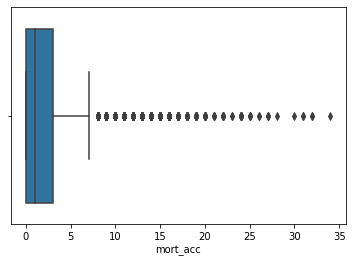

In [164]:
sns.boxplot(df.mort_acc)

<AxesSubplot:xlabel='mort_acc', ylabel='Density'>

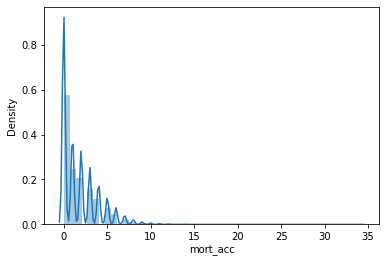

In [165]:
sns.distplot(df.mort_acc)

 - based on the boxplot and the distplot, I think imputing the value of 2 would  be the best approach (mean:1.8, median:1)

In [166]:
# df['mort_acc'] = df['mort_acc'].fillna("2", inplace = True)

In [167]:
df[df.pub_rec_bankruptcies > 0]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
10,10000,36 months,13.11,337.47,B,B4,Sodexo,2 years,RENT,95000.00,Verified,Jun-13,Fully Paid,debt_consolidation,Debt Consolidation,12.04,Dec-90,5,1,4702,64.40,26,f,INDIVIDUAL,4.00,1.00,"40245 Cody Drives\r\nBartlettfort, NM 00813"
17,11200,60 months,12.29,250.79,C,C1,principal,10+ years,MORTGAGE,81000.00,Not Verified,Oct-15,Fully Paid,debt_consolidation,Debt consolidation,12.87,Sep-96,6,1,5874,54.90,20,w,INDIVIDUAL,5.00,1.00,487 Jennifer Parkway Suite 940\r\nCummingsshir...
35,5375,36 months,13.11,181.39,B,B4,NaN,NaN,RENT,34000.00,Verified,May-13,Fully Paid,credit_card,Pay Off Credit Card,26.12,Apr-98,9,1,14998,88.70,20,f,INDIVIDUAL,5.00,1.00,"23617 Michael Viaduct\r\nWest John, MS 05113"
55,15000,36 months,13.98,512.52,C,C3,Armored Car Guard,3 years,OWN,40000.00,Not Verified,Oct-14,Fully Paid,debt_consolidation,Debt consolidation,14.55,Jan-06,4,1,9207,51.70,9,w,INDIVIDUAL,0.00,1.00,"6360 Claire Motorway\r\nEast Shannonchester, A..."
95,30000,36 months,16.49,1061.99,D,D3,Sergeant Major,10+ years,RENT,101000.00,Verified,Nov-14,Fully Paid,debt_consolidation,Debt consolidation,15.76,Jun-03,7,1,6080,76.00,15,f,INDIVIDUAL,2.00,1.00,"2528 Herrera Track Suite 897\r\nSavannahburgh,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395963,7000,36 months,20.20,260.86,E,E3,NaN,NaN,OWN,32964.00,Verified,Jun-14,Fully Paid,medical,Medical expenses,6.33,Jan-04,24,1,3236,9.70,44,w,INDIVIDUAL,0.00,1.00,8339 Daniel Forges Suite 273\r\nPort Oscarmout...
395982,6000,36 months,12.99,202.14,B,B5,owner,2 years,MORTGAGE,50000.00,Verified,Apr-14,Fully Paid,debt_consolidation,Debt consolidation,18.17,May-98,10,1,11011,66.70,26,w,INDIVIDUAL,2.00,1.00,"405 Melissa Well Apt. 054\r\nNorth Josephside,..."
395990,12000,36 months,13.44,406.88,C,C3,teacher,10+ years,MORTGAGE,69400.00,Source Verified,Jan-16,Fully Paid,debt_consolidation,Debt consolidation,14.01,Aug-00,13,1,10782,58.60,28,w,INDIVIDUAL,3.00,1.00,"162 Wright Lock\r\nNorth Timmouth, OH 00813"
395998,10000,36 months,14.16,342.56,C,C2,Sales Representative,< 1 year,OWN,55000.00,Verified,Apr-14,Fully Paid,debt_consolidation,Debt consolidation,16.47,Feb-76,18,1,11513,44.00,51,f,INDIVIDUAL,1.00,1.00,"996 Samuel Lake\r\nSouth Williammouth, NH 05113"


- there are 45115 records with pub_rec_bankruptcies > 0
- total, 395495
- .14% of the total records are null, assuming the ratio would continue, that would account for 63 additional pub rec bankruptcies.
- so we will just drop nulls

### Cleanup Summary
    - drop columns of emp_title, emp_length, title
    - drop rows with null values in col revol_util, pub_rec_bankruptcies
    - impute nulls with value of 2 in mort_acc feature based on boxplot/distplots
    -create clean_lending() function

In [168]:
def clean_lending(df):
    #drop unneeded columns
    df = df.drop(['emp_title'], axis=1)
    df = df.drop(['emp_length'], axis=1)
    df = df.drop(['title'], axis=1)
    
    #impute
    df['mort_acc'].fillna(2.0, inplace = True)
    
    #drop small amount of nulls
    df = df.dropna()
    
    return df    

In [169]:
#validate
df = clean_lending(df)
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

### EDA
    - learn about important features and visualize data

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395219 non-null  int64  
 1   term                  395219 non-null  object 
 2   int_rate              395219 non-null  float64
 3   installment           395219 non-null  float64
 4   grade                 395219 non-null  object 
 5   sub_grade             395219 non-null  object 
 6   home_ownership        395219 non-null  object 
 7   annual_inc            395219 non-null  float64
 8   verification_status   395219 non-null  object 
 9   issue_d               395219 non-null  object 
 10  loan_status           395219 non-null  object 
 11  purpose               395219 non-null  object 
 12  dti                   395219 non-null  float64
 13  earliest_cr_line      395219 non-null  object 
 14  open_acc              395219 non-null  int64  
 15  

In [24]:
df.astype({'loan_amnt': 'float64'}).dtypes

loan_amnt               float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
dti                     float64
earliest_cr_line         object
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util              float64
total_acc                 int64
initial_list_status      object
application_type         object
mort_acc                float64
pub_rec_bankruptcies    float64
address                  object
dtype: object

In [25]:
object_cols = list(df.select_dtypes(include='object'))
float_cols = list(df.select_dtypes(include='float64'))

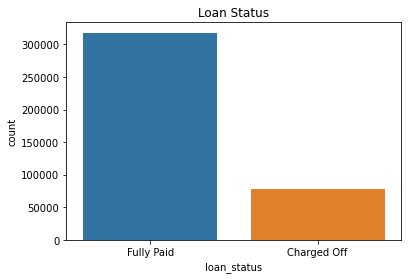

In [26]:
#count of target variable
sns.countplot(data=df, x='loan_status', )
plt.title("Loan Status")
plt.ylabel("count")
plt.show() 

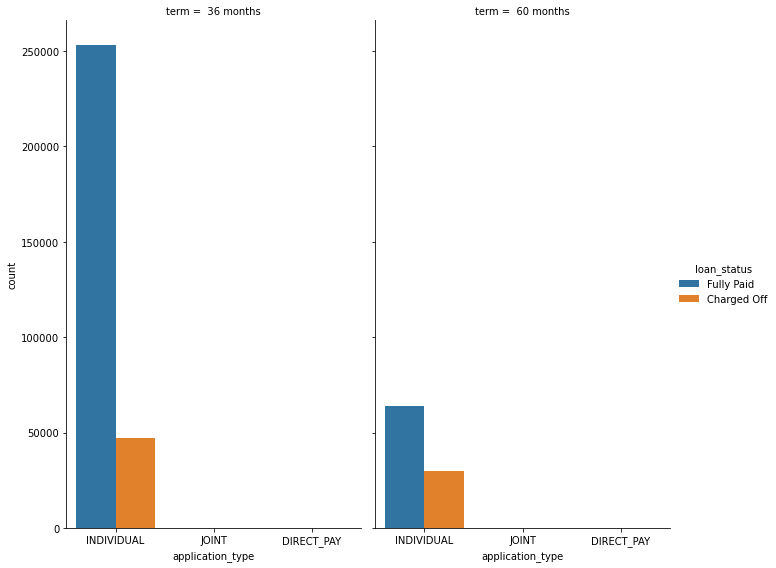

In [52]:
g = sns.catplot(x="application_type", hue="loan_status", col="term",
                data=df, kind="count",
                height=8, aspect=.6);

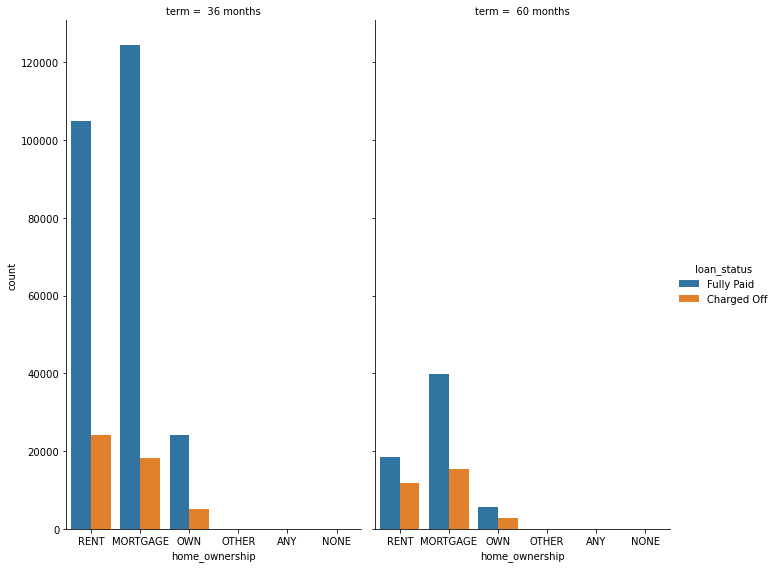

In [54]:
g = sns.catplot(x="home_ownership", hue="loan_status", col="term",
                data=df, kind="count",
                height=8, aspect=.6);

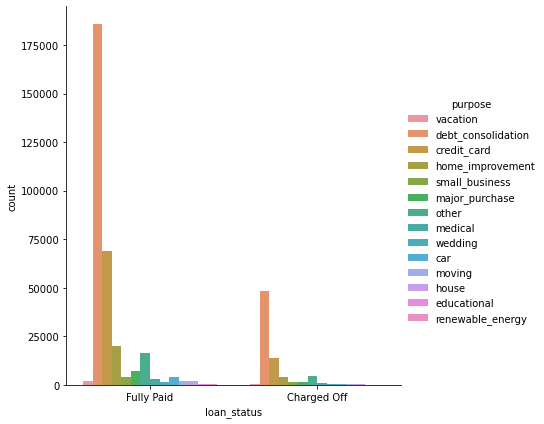

In [66]:
g = sns.catplot(x="loan_status", hue="purpose",
                data=df, kind="count",
                height=6, aspect=1);

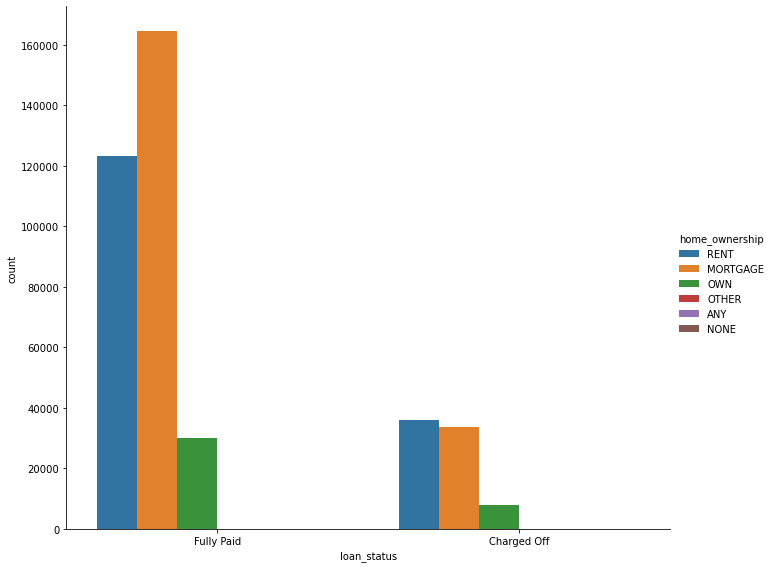

In [69]:
g = sns.catplot(x="loan_status", hue="home_ownership",
                data=df, kind="count",
                height=8, aspect=1.2);

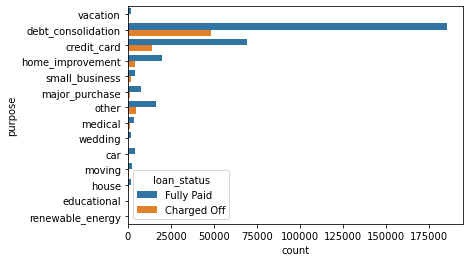

In [73]:
ax = sns.countplot(y="purpose", hue="loan_status", data=df)

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

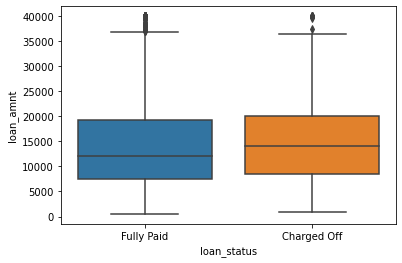

In [84]:

sns.boxplot(x='loan_status', y='loan_amnt', data=df)

<AxesSubplot:xlabel='loan_status', ylabel='installment'>

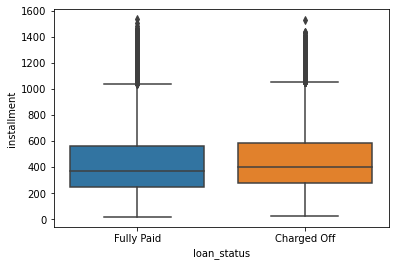

In [85]:
sns.boxplot(x='loan_status', y='installment', data=df)

<AxesSubplot:xlabel='loan_status', ylabel='int_rate'>

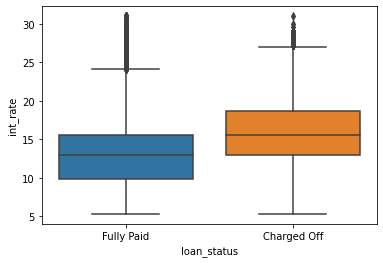

In [87]:
sns.boxplot(x='loan_status', y='int_rate', data=df)

<AxesSubplot:xlabel='loan_status', ylabel='annual_inc'>

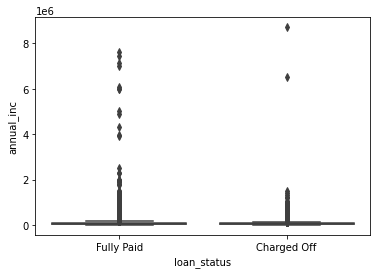

In [91]:
sns.boxplot(x='loan_status', y='annual_inc', data=df)

- may want to consider honing in some additional outliers, drop annual income greater than 250k

<AxesSubplot:xlabel='loan_status', ylabel='dti'>

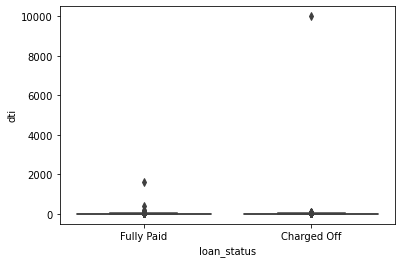

In [92]:
sns.boxplot(x='loan_status', y='dti', data=df)

- may want to consider honing in some additional outliers, drop dti greater than 40

<AxesSubplot:xlabel='loan_status', ylabel='open_acc'>

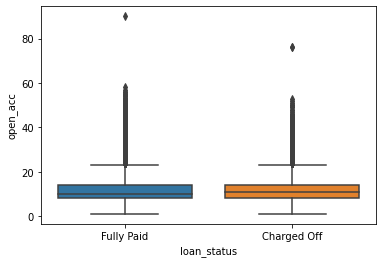

In [104]:
sns.boxplot(x='loan_status', y='open_acc', data=df)

- may want to consider honing in some additional outliers, open acc greater than 60

<AxesSubplot:xlabel='loan_status', ylabel='pub_rec'>

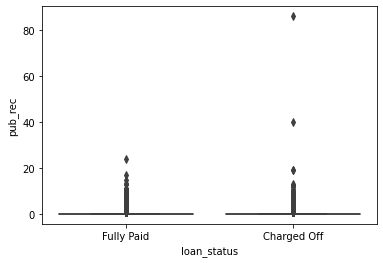

In [103]:
sns.boxplot(x='loan_status', y='pub_rec', data=df)

- may want to consider honing in some additional outliers, drop pub rec greater than 25

<AxesSubplot:xlabel='loan_status', ylabel='revol_util'>

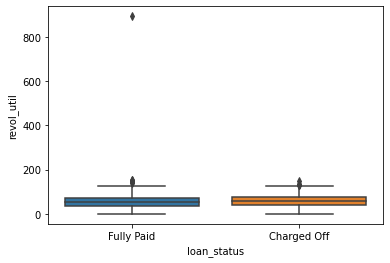

In [102]:
sns.boxplot(x='loan_status', y='revol_util', data=df)

<AxesSubplot:xlabel='loan_status', ylabel='total_acc'>

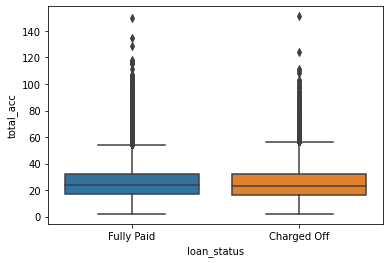

In [101]:
sns.boxplot(x='loan_status', y='total_acc', data=df)

- may want to consider honing in some additional outliers, total acc greater than 110

<AxesSubplot:xlabel='grade', ylabel='total_acc'>

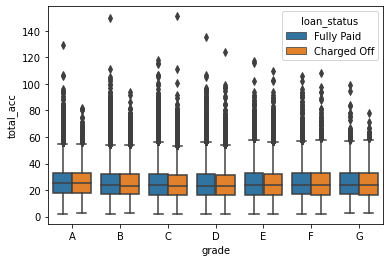

In [110]:
sns.boxplot(x='grade', y='total_acc', hue='loan_status', order = ['A','B','C','D','E','F','G'], data=df)

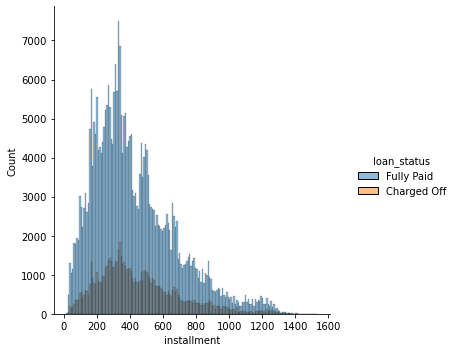

In [113]:
sns.displot(data=df, x='installment', hue='loan_status')

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

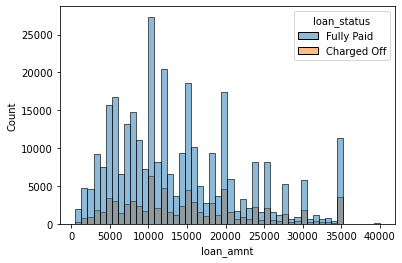

In [182]:
sns.histplot(data=df, x='loan_amnt', hue='loan_status', bins=50)

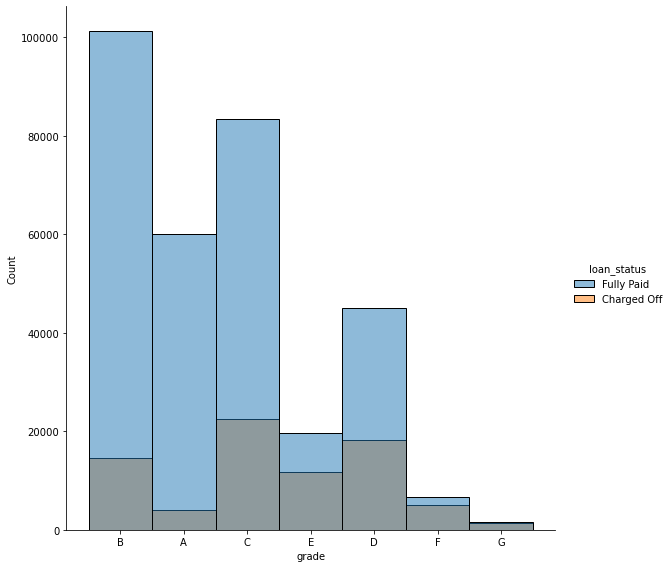

In [135]:
sns.displot(data=df, x='grade', hue='loan_status',height=8, aspect=1)

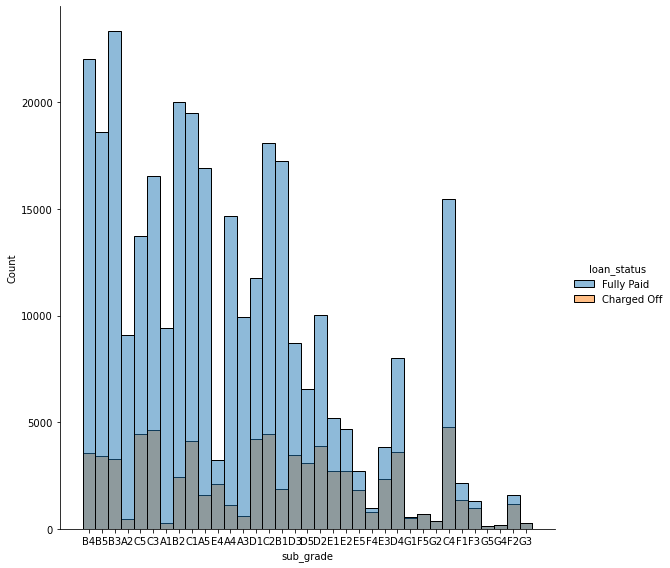

In [131]:
sns.displot(data=df, x='sub_grade', hue='loan_status', height=8, aspect=1)

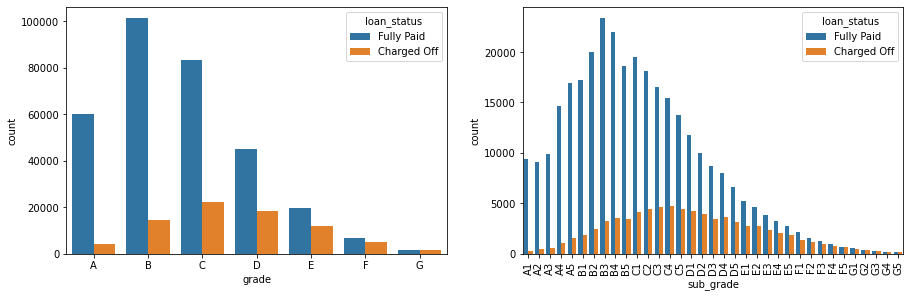

In [170]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
grade = sorted(df.grade.unique().tolist())
sns.countplot(x='grade', data=df, hue='loan_status', order=grade)

plt.subplot(2, 2, 2)
sub_grade = sorted(df.sub_grade.unique().tolist())
g = sns.countplot(x='sub_grade', data=df, hue='loan_status', order=sub_grade)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

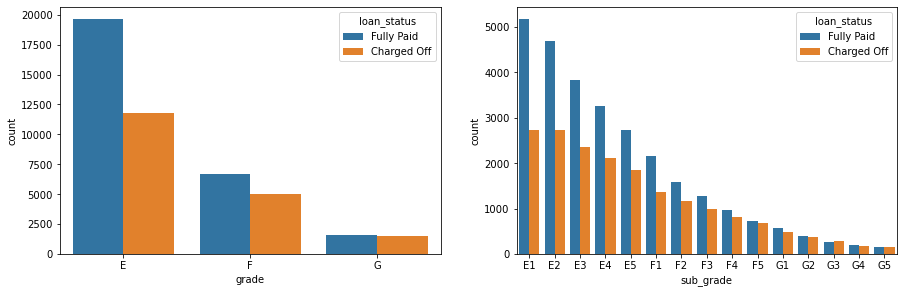

In [175]:
c = df[(df.grade == 'E')| (df.grade == 'F')| (df.grade == 'G')]

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
grade = sorted(c.grade.unique().tolist())
sns.countplot(x='grade', data=c, hue='loan_status',hue_order=['Fully Paid','Charged Off'], order=grade)

plt.subplot(2, 2, 2)
sub_grade = sorted(c.sub_grade.unique().tolist())
sns.countplot(x='sub_grade', data=c, hue='loan_status',hue_order=['Fully Paid','Charged Off'], order=sub_grade)

<AxesSubplot:xlabel='int_rate', ylabel='Count'>

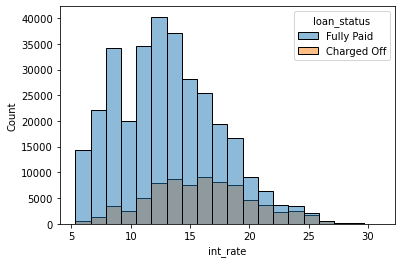

In [180]:
sns.histplot(data=df, x='int_rate', hue='loan_status', bins= 20)

In [197]:
df.loc[df.dti >= 40, 'loan_status'].value_counts()

Fully Paid     200
Charged Off     96
Name: loan_status, dtype: int64

In [198]:
df.loc[df.dti <= 40, 'loan_status'].value_counts()

Fully Paid     317496
Charged Off     77427
Name: loan_status, dtype: int64

In [188]:
df.loc[df.annual_inc >= 1000000, 'loan_status'].value_counts()

Fully Paid     64
Charged Off    10
Name: loan_status, dtype: int64

In [204]:
df.loc[df.annual_inc <= 250000, 'loan_status'].value_counts()

Fully Paid     314849
Charged Off     77085
Name: loan_status, dtype: int64

### EDA Outlier Analysis
- get rid of dti > 40
- get rid of total_acc > 115
- get rid of annual_inc > 250,000
- get rid of revol_util > 200
- get rid of pub_rec > 25
- get rid of open_acc > 60
- get rid of small proportion of home_ownership values for ['OTHER','ANY','NONE']

In [304]:
def remove_outliers(df):
    
    """Manually handle outliers according to eda"""
    df = df[df.dti <= 40]
    
    df = df[df.total_acc <= 115]

    df = df[df.annual_inc <= 250_000]
    
    df = df[df.revol_util <= 200]
    
    df = df[df.pub_rec <= 25]

    df = df[df.open_acc <= 60]
    
    df = df[df.home_ownership != 'ANY']
    df = df[df.home_ownership != 'NONE']
    df = df[df.home_ownership != 'OTHER']

    return df
    

In [206]:
df = remove_outliers(df)

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391623 entries, 0 to 396029
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             391623 non-null  int64  
 1   term                  391623 non-null  object 
 2   int_rate              391623 non-null  float64
 3   installment           391623 non-null  float64
 4   grade                 391623 non-null  object 
 5   sub_grade             391623 non-null  object 
 6   home_ownership        391623 non-null  object 
 7   annual_inc            391623 non-null  float64
 8   verification_status   391623 non-null  object 
 9   issue_d               391623 non-null  object 
 10  loan_status           391623 non-null  object 
 11  purpose               391623 non-null  object 
 12  dti                   391623 non-null  float64
 13  earliest_cr_line      391623 non-null  object 
 14  open_acc              391623 non-null  int64  
 15  

<AxesSubplot:>

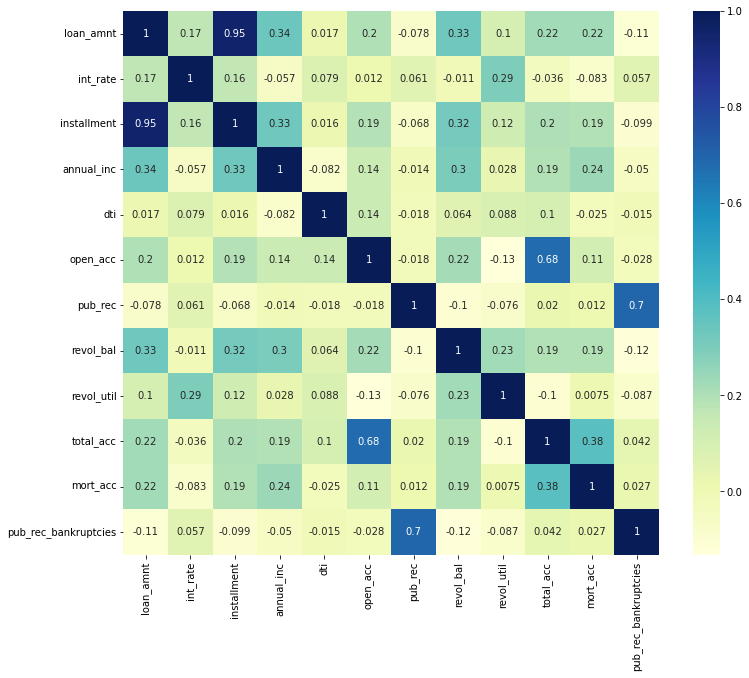

In [70]:
#examining the correllation between the features
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu')

#### Heatmap takeaways:
- loan amount and installment are appear to be highly correlated
- loan amount and revol balance appear to be correlated 
- loan amount and annual income appear to be correlated
- annual income and installment appear to be correlated

### Split Data

In [211]:
def split_data(df):
    '''
    Takes in the original cleaned, prepped df and returns train, validate, and test dfs.
    '''
    train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=123, 
                                        stratify=df.loan_status)

    train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123, 
                                   stratify=train_validate.loan_status)
    return train, validate, test

In [480]:
train, validate, test = split_data(df)

In [481]:
train.shape, validate.shape, test.shape

((219308, 24), (93990, 24), (78325, 24))

In [441]:
# list all categorical & quantitative variables/features
# uni-/bi-variate stats
cat_vars = list(train.select_dtypes(include='object'))
quant_vars = list(train.select_dtypes(include='float64'))
target = 'loan_status'

In [442]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219308 entries, 343977 to 269846
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             219308 non-null  int64  
 1   term                  219308 non-null  object 
 2   int_rate              219308 non-null  float64
 3   installment           219308 non-null  float64
 4   grade                 219308 non-null  object 
 5   sub_grade             219308 non-null  object 
 6   home_ownership        219308 non-null  object 
 7   annual_inc            219308 non-null  float64
 8   verification_status   219308 non-null  object 
 9   issue_d               219308 non-null  object 
 10  loan_status           219308 non-null  object 
 11  purpose               219308 non-null  object 
 12  dti                   219308 non-null  float64
 13  earliest_cr_line      219308 non-null  object 
 14  open_acc              219308 non-null  int64  


In [443]:
#sns.pairplot(data=train, hue='loan_status', x_vars=['purpose', 'int_rate', 'installment', 'sub_grade','revol_util'],y_vars=['home_ownership', 'annual_inc','dti', 'installment','revol_bal'  ])

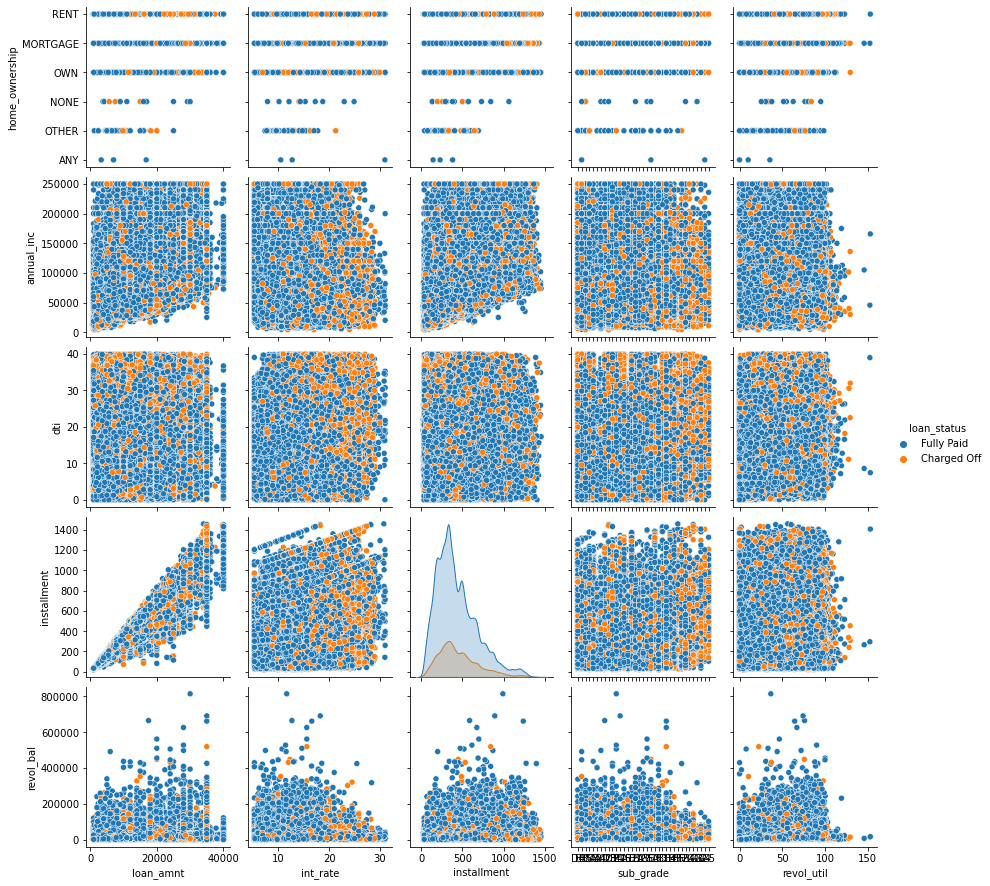

In [444]:
sns.pairplot(data=train, hue='loan_status', x_vars=['loan_amnt', 'int_rate', 'installment', 'sub_grade','revol_util'],y_vars=['home_ownership', 'annual_inc','dti', 'installment','revol_bal'  ])

#### additional takeaways
- high loan amount, high installment, looks like it has more charge offs
- high int rate, looks like high charge offs
- high loan amount for renters looks like higher charge offs
- high int rate, high dti, higher charge offs
- low subgrade/grade, looks like higher charge offs

In [445]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219308 entries, 343977 to 269846
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             219308 non-null  int64  
 1   term                  219308 non-null  object 
 2   int_rate              219308 non-null  float64
 3   installment           219308 non-null  float64
 4   grade                 219308 non-null  object 
 5   sub_grade             219308 non-null  object 
 6   home_ownership        219308 non-null  object 
 7   annual_inc            219308 non-null  float64
 8   verification_status   219308 non-null  object 
 9   issue_d               219308 non-null  object 
 10  loan_status           219308 non-null  object 
 11  purpose               219308 non-null  object 
 12  dti                   219308 non-null  float64
 13  earliest_cr_line      219308 non-null  object 
 14  open_acc              219308 non-null  int64  


#### Identify features based on EDA that appear to be predictors for loan default
- categoricals:['grade','home_ownership','purpose']
- numericals:['loan_amnt','int_rate','installment','annual_inc','dti','mort_acc']

#### Encode Categoricals

#### Look at Decision Tree

In [446]:
train.grade.value_counts()

B    64298
C    58823
A    35493
D    35243
E    17283
F     6485
G     1683
Name: grade, dtype: int64

In [482]:
#encode categoricals
train['grade_encoded'] = train.grade.map({'A': 0, 'B': 1,'C': 2, 'D': 3,'E': 4, 'F': 5, 'G': 5})

In [483]:
validate['grade_encoded'] = validate.grade.map({'A': 0, 'B': 1,'C': 2, 'D': 3,'E': 4, 'F': 5, 'G': 5})
test['grade_encoded'] = test.grade.map({'A': 0, 'B': 1,'C': 2, 'D': 3,'E': 4, 'F': 5, 'G': 5})

In [484]:
train.home_ownership.value_counts()

MORTGAGE    109530
RENT         88928
OWN          20772
OTHER           61
NONE            14
ANY              3
Name: home_ownership, dtype: int64

In [485]:
#encode categoricals
train['home_ownership_encoded'] = train.home_ownership.map({'MORTGAGE': 0, 'RENT': 1,'OWN': 2})

In [486]:
validate['home_ownership_encoded'] = validate.home_ownership.map({'MORTGAGE': 0, 'RENT': 1,'OWN': 2})
test['home_ownership_encoded'] = test.home_ownership.map({'MORTGAGE': 0, 'RENT': 1,'OWN': 2})

In [487]:
# train.purpose.value_counts()

In [488]:
# # Encode purpose by creating dummy vars and concat with original df
# encoded_purpose = pd.get_dummies(train.purpose, drop_first=True)
# train = pd.concat([train, encoded_purpose], axis=1)

In [489]:
# # Encode purpose by creating dummy vars and concat with original df
# encoded_purpose = pd.get_dummies(validate.purpose, drop_first=True)
# validate = pd.concat([validate, encoded_purpose], axis=1)

In [490]:
# # Encode purpose by creating dummy vars and concat with original df
# encoded_purpose = pd.get_dummies(test.purpose, drop_first=True)
# test = pd.concat([test, encoded_purpose], axis=1)

In [491]:
# train = train[train.home_ownership != 'ANY']
# train = train[train.home_ownership != 'NONE']
# train = train[train.home_ownership != 'OTHER']

In [492]:
# validate = validate[validate.home_ownership != 'ANY']
# validate = validate[validate.home_ownership != 'NONE']
# validate = validate[validate.home_ownership != 'OTHER']
# test = test[test.home_ownership != 'ANY']
# test = test[test.home_ownership != 'NONE']
# test = test[test.home_ownership != 'OTHER']

In [493]:
# Encode by creating dummy vars and concat with original df
encoded_initial_list_status = pd.get_dummies(train.initial_list_status, drop_first=True)
train = pd.concat([train, encoded_initial_list_status], axis=1)

In [494]:
# Encode by creating dummy vars and concat with original df
encoded_initial_list_status = pd.get_dummies(validate.initial_list_status, drop_first=True)
validate = pd.concat([validate, encoded_initial_list_status], axis=1)

In [495]:
# Encode by creating dummy vars and concat with original df
encoded_initial_list_status = pd.get_dummies(test.initial_list_status, drop_first=True)
test = pd.concat([test, encoded_initial_list_status], axis=1)

In [496]:
# Encode verification_status by creating dummy vars and concat with original df
encoded_verification_status = pd.get_dummies(train.verification_status, drop_first=True)
train = pd.concat([train, encoded_verification_status], axis=1)

In [497]:
# Encode verification_status by creating dummy vars and concat with original df
encoded_verification_status = pd.get_dummies(validate.verification_status, drop_first=True)
validate = pd.concat([validate, encoded_verification_status], axis=1)

In [498]:
# Encode verification_status by creating dummy vars and concat with original df
encoded_verification_status = pd.get_dummies(test.verification_status, drop_first=True)
test = pd.concat([test, encoded_verification_status], axis=1)

In [847]:
def encode_features(train, validate, test):
    #encode categoricals
    train['home_ownership_encoded'] = train.home_ownership.map({'MORTGAGE': 0, 'RENT': 1,'OWN': 2})
    validate['home_ownership_encoded'] = validate.home_ownership.map({'MORTGAGE': 0, 'RENT': 1,'OWN': 2})
    test['home_ownership_encoded'] = test.home_ownership.map({'MORTGAGE': 0, 'RENT': 1,'OWN': 2})
    
    # Encode by creating dummy vars and concat with original df
    encoded_initial_list_status = pd.get_dummies(train.initial_list_status, drop_first=True)
    train = pd.concat([train, encoded_initial_list_status], axis=1)
    encoded_initial_list_status = pd.get_dummies(validate.initial_list_status, drop_first=True)
    validate = pd.concat([validate, encoded_initial_list_status], axis=1)
    encoded_initial_list_status = pd.get_dummies(test.initial_list_status, drop_first=True)
    test = pd.concat([test, encoded_initial_list_status], axis=1)
    
    encoded_verification_status = pd.get_dummies(train.verification_status, drop_first=True)
    train = pd.concat([train, encoded_verification_status], axis=1)
    encoded_verification_status = pd.get_dummies(validate.verification_status, drop_first=True)
    validate = pd.concat([validate, encoded_verification_status], axis=1)
    encoded_verification_status = pd.get_dummies(test.verification_status, drop_first=True)
    test = pd.concat([test, encoded_verification_status], axis=1)
    
    return train, validate, test
    

In [499]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219230 entries, 343977 to 269846
Data columns (total 29 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   loan_amnt               219230 non-null  int64  
 1   term                    219230 non-null  object 
 2   int_rate                219230 non-null  float64
 3   installment             219230 non-null  float64
 4   grade                   219230 non-null  object 
 5   sub_grade               219230 non-null  object 
 6   home_ownership          219230 non-null  object 
 7   annual_inc              219230 non-null  float64
 8   verification_status     219230 non-null  object 
 9   issue_d                 219230 non-null  object 
 10  loan_status             219230 non-null  object 
 11  purpose                 219230 non-null  object 
 12  dti                     219230 non-null  float64
 13  earliest_cr_line        219230 non-null  object 
 14  open_acc       

In [500]:
train.shape,validate.shape,test.shape

((219230, 29), (93956, 29), (78296, 29))

- drop unneeded columns

In [848]:
def drop_columns(train, validate, test):
    train = train.drop(columns=['term', 'grade', 'sub_grade','home_ownership', 'issue_d','purpose', 'verification_status','earliest_cr_line', 'initial_list_status','open_acc', 'pub_rec', 'total_acc', 
                                'application_type', 'pub_rec_bankruptcies', 'address'])
    validate = validate.drop(columns = ['term', 'grade', 'sub_grade','home_ownership', 'issue_d','purpose', 'verification_status','earliest_cr_line', 'initial_list_status','open_acc', 'pub_rec', 'total_acc', 
                                'application_type', 'pub_rec_bankruptcies', 'address'])
    test = test.drop(columns = ['term', 'grade', 'sub_grade','home_ownership', 'issue_d','purpose', 'verification_status','earliest_cr_line', 'initial_list_status','open_acc', 'pub_rec', 'total_acc', 
                                'application_type', 'pub_rec_bankruptcies', 'address'])
    return train, validate, test

In [501]:
train = train.drop(columns=['term',
 'grade',
 'sub_grade',
 'home_ownership',
 'issue_d',
 'purpose',
 'verification_status',                           
 'earliest_cr_line',
 'initial_list_status',                          
 'open_acc',
 'pub_rec',
 'total_acc',
 'application_type',
 'pub_rec_bankruptcies',
 'address'])
validate= validate.drop(columns = ['term',
 'grade',
 'sub_grade',
 'home_ownership',
 'issue_d',
 'purpose',
 'verification_status',                           
 'earliest_cr_line',
 'initial_list_status',                          
 'open_acc',
 'pub_rec',
 'total_acc',
 'application_type',
 'pub_rec_bankruptcies',
 'address'])
test = test.drop(columns = ['term',
 'grade',
 'sub_grade',
 'home_ownership',
 'issue_d',
 'purpose',
 'verification_status',                           
 'earliest_cr_line',
 'initial_list_status',                          
 'open_acc',
 'pub_rec',
 'total_acc',
 'application_type',
 'pub_rec_bankruptcies',
 'address'])

In [502]:
train.shape, validate.shape, test.shape

((219230, 14), (93956, 14), (78296, 14))

In [ ]:
['term',
 'grade',
 'sub_grade',
 'home_ownership',
 'verification_status',
 'issue_d',
 'purpose',
 'earliest_cr_line',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'application_type',
 'pub_rec_bankruptcies',
 'address']

In [503]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219230 entries, 343977 to 269846
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   loan_amnt               219230 non-null  int64  
 1   int_rate                219230 non-null  float64
 2   installment             219230 non-null  float64
 3   annual_inc              219230 non-null  float64
 4   loan_status             219230 non-null  object 
 5   dti                     219230 non-null  float64
 6   revol_bal               219230 non-null  int64  
 7   revol_util              219230 non-null  float64
 8   mort_acc                219230 non-null  float64
 9   grade_encoded           219230 non-null  int64  
 10  home_ownership_encoded  219230 non-null  float64
 11  w                       219230 non-null  uint8  
 12  Source Verified         219230 non-null  uint8  
 13  Verified                219230 non-null  uint8  
dtypes: float64(7), 

In [ ]:
loan_amnt,int_rate,installment, annual_inc, dti, revol_bal,revol_util , mort_acc,grade_encoded, home_ownership_encoded,  w, Source Verified, Verified 

In [504]:
train.head()

,loan_amnt,int_rate,installment,annual_inc,loan_status,dti,revol_bal,revol_util,mort_acc,grade_encoded,home_ownership_encoded,w,Source Verified,Verified
343977,17575,19.52,648.86,108000.00,Fully Paid,12.23,10041,58.40,0.00,3,1.00,1,0,1
382770,20000,11.99,664.20,140000.00,Fully Paid,2.25,7880,74.30,4.00,1,0.00,1,1,0
189712,28000,11.53,616.22,130000.00,Fully Paid,36.37,26381,50.20,0.00,1,1.00,1,1,0
148097,20000,16.20,488.49,115000.00,Fully Paid,21.41,34659,43.30,4.00,2,1.00,0,0,1
340463,1000,14.64,34.49,29000.00,Fully Paid,13.41,2829,41.00,3.00,2,0.00,0,0,0


### Modeling

- establish baseline
- fit models on train sets only
- 80% of the observations were fully paid, so if we predict all of the observations are fully paid, baseline would predict correctly 80% of the time, establishing a baseline accuracy of 80%

In [505]:
train.loan_status.value_counts(normalize=True)

Fully Paid    0.80
Charged Off   0.20
Name: loan_status, dtype: float64

- Define X and Y based on my refined features
- remove target variable (loan_status) and set as Y

In [506]:
X_train = train.drop(columns=['loan_status'])
y_train = train.loan_status

X_validate = validate.drop(columns=['loan_status'])
y_validate = validate.loan_status

X_test = test.drop(columns=['loan_status'])
y_test = test.loan_status

### Create the Decision Tree Model

In [551]:
clf = DecisionTreeClassifier(max_depth=15, random_state=123)

### Fit the Model

In [552]:
clf = clf.fit(X_train, y_train)

[Text(0.5198825017014439, 0.96875, 'grade_encoded <= 2.5\ngini = 0.316\nsamples = 219230\nvalue = [43099, 176131]\nclass = Fully Paid'),
 Text(0.24544263524725313, 0.90625, 'grade_encoded <= 1.5\ngini = 0.247\nsamples = 158551\nvalue = [22843, 135708]\nclass = Fully Paid'),
 Text(0.09862602919818138, 0.84375, 'grade_encoded <= 0.5\ngini = 0.186\nsamples = 99745\nvalue = [10356, 89389]\nclass = Fully Paid'),
 Text(0.039010864684338294, 0.78125, 'int_rate <= 7.64\ngini = 0.119\nsamples = 35477\nvalue = [2247, 33230]\nclass = Fully Paid'),
 Text(0.016432089583654913, 0.71875, 'annual_inc <= 36998.0\ngini = 0.092\nsamples = 19626\nvalue = [949, 18677]\nclass = Fully Paid'),
 Text(0.005085914148997376, 0.65625, 'revol_util <= 27.65\ngini = 0.171\nsamples = 1640\nvalue = [155, 1485]\nclass = Fully Paid'),
 Text(0.002434643503641441, 0.59375, 'dti <= 32.84\ngini = 0.127\nsamples = 943\nvalue = [64, 879]\nclass = Fully Paid'),
 Text(0.0016698707604226597, 0.53125, 'installment <= 30.79\ngini =

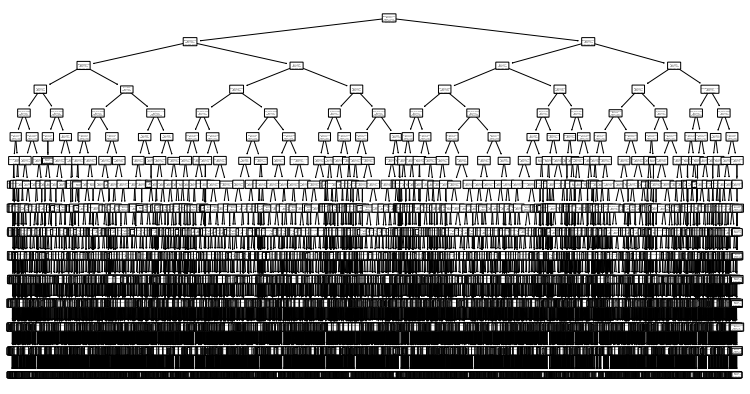

In [553]:
#Visualize a Decision Tree
plt.figure(figsize=(13, 7))
plot_tree(clf, feature_names=X_train.columns, class_names=clf.classes_, rounded=True)

#### Make prediction on train obeservations

In [554]:
y_pred = clf.predict(X_train)
y_pred[0:100]

array(['Fully Paid', 'Fully Paid', 'Fully Paid', 'Fully Paid',
       'Fully Paid', 'Fully Paid', 'Fully Paid', 'Fully Paid',
       'Fully Paid', 'Fully Paid', 'Charged Off', 'Fully Paid',
       'Fully Paid', 'Fully Paid', 'Fully Paid', 'Fully Paid',
       'Fully Paid', 'Fully Paid', 'Fully Paid', 'Fully Paid',
       'Fully Paid', 'Fully Paid', 'Fully Paid', 'Fully Paid',
       'Fully Paid', 'Fully Paid', 'Fully Paid', 'Fully Paid',
       'Fully Paid', 'Fully Paid', 'Fully Paid', 'Fully Paid',
       'Fully Paid', 'Fully Paid', 'Fully Paid', 'Fully Paid',
       'Fully Paid', 'Fully Paid', 'Fully Paid', 'Fully Paid',
       'Fully Paid', 'Fully Paid', 'Fully Paid', 'Fully Paid',
       'Charged Off', 'Fully Paid', 'Fully Paid', 'Fully Paid',
       'Fully Paid', 'Fully Paid', 'Fully Paid', 'Fully Paid',
       'Fully Paid', 'Fully Paid', 'Fully Paid', 'Fully Paid',
       'Fully Paid', 'Fully Paid', 'Fully Paid', 'Fully Paid',
       'Charged Off', 'Fully Paid', 'Fully Paid', 'Fu

#### Estimate Probability

In [555]:

y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[0:5]

array([[0.        , 1.        ],
       [0.09163347, 0.90836653],
       [0.22797927, 0.77202073],
       [0.12060302, 0.87939698],
       [0.        , 1.        ]])

#### Evaluate Model

In [556]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.85


#### Create a confusion matrix

- True Positive: number of occurrences where y is true and y is predicted true.
- True Negative: number of occurrences where y is false and y is predicted false.
- False Positive: number of occurrences where y is false and y is predicted true.
- False Negative: number of occurrences where y is true and y is predicted false

In [557]:
confusion_matrix(y_train, y_pred)

array([[ 14053,  29046],
       [  4470, 171661]], dtype=int64)

In [558]:
y_train.value_counts()

Fully Paid     176131
Charged Off     43099
Name: loan_status, dtype: int64

In [559]:
labels = sorted(y_train.unique())

pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)

,Charged Off,Fully Paid
Charged Off,14053,29046
Fully Paid,4470,171661


#### Classification Report

In [560]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

 Charged Off       0.76      0.33      0.46     43099
  Fully Paid       0.86      0.97      0.91    176131

    accuracy                           0.85    219230
   macro avg       0.81      0.65      0.68    219230
weighted avg       0.84      0.85      0.82    219230



### Lots of trials of varying depths, started at 3 resulting in charge off precision of 60% increasing depth to 15 increased charge off precision 16% to 76% and Paid precision to 86%

### Create Random Forest Model

In [820]:
rf = RandomForestClassifier(max_depth=15, random_state=123)

In [403]:
#create a function to calculate the metrics
def get_metrics(mod, X, y):
    baseline_accuracy = (train.loan_status == 0).mean()
    y_pred = mod.predict(X)
    accuracy = mod.score(X, y)
    prfs = pd.DataFrame(precision_recall_fscore_support(y, y_pred), index=['precision', 'recall', 'f1-score', 'support'])
    
    print(f'''
    BASELINE accuracy is: {baseline_accuracy:.2%}
    The accuracy for our model is: {accuracy:.2%} 
    ''')
    return prfs

#### Fit the model

In [821]:
rf = rf.fit(X_train, y_train)
rf

RandomForestClassifier(max_depth=15, random_state=123)

In [822]:
# visualize the importance weight
feature_importances = pd.DataFrame(rf.feature_importances_,
                                  index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
int_rate,0.16
dti,0.13
grade_encoded,0.12
revol_bal,0.11
annual_inc,0.10
installment,0.10
revol_util,0.10
loan_amnt,0.08
mort_acc,0.04
home_ownership_encoded,0.02


#### Make Predictions

In [823]:
#make predictions
y_pred = rf.predict(X_train)
# estimate probability:
y_pred_proba = rf.predict_proba(X_train)

#### Compute Accuracy

In [824]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.84


#### Confusion Matrix

In [825]:
print(confusion_matrix(y_train, y_pred))

[[  8029  35070]
 [   338 175793]]


#### Classification Report

Precision: 
TP/(TP+FP)

Recall:
TP/(TP+FN)

F1-Score: A measure of accuracy. The harmonic mean of precision & recall. The harmonic mean is the reciprocal of the arithmetic mean of the reciprocals.

F1 ∈[0,1]

F1-score = harmonic mean = 2/(1/precision)+(1/recall)

Support: number of occurrences of each class.


In [826]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

 Charged Off       0.96      0.19      0.31     43099
  Fully Paid       0.83      1.00      0.91    176131

    accuracy                           0.84    219230
   macro avg       0.90      0.59      0.61    219230
weighted avg       0.86      0.84      0.79    219230



#### After concluding trials, starting with depth of 3 yielding precision of 0%, increasing to depth of 14, increased to 82% precision

### Create KNN Model

In [827]:
# weights = ['uniform', 'density']
knn = KNeighborsClassifier(n_neighbors=3, weights='uniform')

#### Fit the model

In [828]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

#### Make Predictions

In [829]:
y_pred = knn.predict(X_train)

#### Estimate Probability

In [830]:
y_pred_proba = knn.predict_proba(X_train)

#### Evaluate Model

In [831]:
#accuracy
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.85


#### Confusion Matrix

In [832]:
print(confusion_matrix(y_train, y_pred))

[[ 16592  26507]
 [  7062 169069]]


In [833]:
labels = sorted(y_train.unique())

pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)

,Charged Off,Fully Paid
Charged Off,16592,26507
Fully Paid,7062,169069


#### Classification Report

In [834]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

 Charged Off       0.70      0.38      0.50     43099
  Fully Paid       0.86      0.96      0.91    176131

    accuracy                           0.85    219230
   macro avg       0.78      0.67      0.70    219230
weighted avg       0.83      0.85      0.83    219230



#### After trials, better performance with lower n values, n=3 yielded 86% precision on fully paid, and 70% charged off

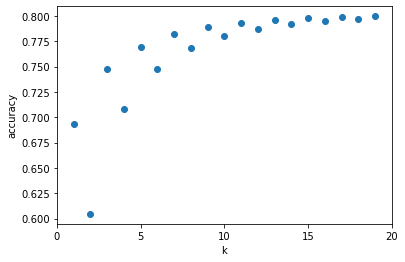

In [645]:
import matplotlib.pyplot as plt
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])
plt.show()

### Top three models selected, will run those through the validate sets
- Decision tree depth=15
- Random Forest depth=12
- KNN n=4

#### Decision Tree Validate Set

In [793]:
#compute accuracy
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(clf.score(X_validate, y_validate)))

Accuracy of Decision Tree classifier on validate set: 0.78


In [796]:
# Produce y_predictions that come from the X_validate
y_pred = clf.predict(X_validate)

# estimate probability:
y_pred_proba = clf.predict_proba(X_validate)


In [797]:
# Compare actual y values (from validate) to predicted y_values from the model run on X_validate
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

 Charged Off       0.36      0.16      0.22     18469
  Fully Paid       0.82      0.93      0.87     75487

    accuracy                           0.78     93956
   macro avg       0.59      0.54      0.55     93956
weighted avg       0.73      0.78      0.74     93956



#### Random Forest Validate Set

In [835]:
#compute accuracy
print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(rf.score(X_validate, y_validate)))

Accuracy of random forest classifier on test set: 0.81


In [836]:
#make predictions
y_pred = rf.predict(X_validate)
# estimate probability:
y_pred_proba = rf.predict_proba(X_validate)

In [837]:
# Compare actual y values (from validate) to predicted y_values from the model run on X_validate
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

 Charged Off       0.58      0.06      0.11     18469
  Fully Paid       0.81      0.99      0.89     75487

    accuracy                           0.81     93956
   macro avg       0.69      0.53      0.50     93956
weighted avg       0.77      0.81      0.74     93956



#### KNN Model Validate Set

In [844]:
#compute accuracy
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(knn.score(X_validate, y_validate)))

Accuracy of KNN classifier on test set: 0.75


In [845]:
#make predictions
y_pred = knn.predict(X_validate)
# estimate probability:
y_pred_proba = knn.predict_proba(X_validate)

In [846]:
# Compare actual y values (from validate) to predicted y_values from the model run on X_validate
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

 Charged Off       0.24      0.13      0.17     18469
  Fully Paid       0.81      0.90      0.85     75487

    accuracy                           0.75     93956
   macro avg       0.52      0.51      0.51     93956
weighted avg       0.70      0.75      0.72     93956



### Model Testing
-Random Forest depth 15 on test set

In [838]:
#compute accuracy
print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(rf.score(X_test, y_test)))

Accuracy of random forest classifier on test set: 0.80


In [839]:
#make predictions
y_pred = rf.predict(X_test)
# estimate probability:
y_pred_proba = rf.predict_proba(X_test)

In [843]:
# Compare actual y values (from validate) to predicted y_values from the model run on X_validate
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

 Charged Off       0.53      0.05      0.10     15392
  Fully Paid       0.81      0.99      0.89     62904

    accuracy                           0.80     78296
   macro avg       0.67      0.52      0.49     78296
weighted avg       0.76      0.80      0.73     78296



## Summary
### Following the evaluation of the different models using my selected features, I found that the best performing model was the Random Forest with depth 15

### Looks like the models performance does much better as the the depth increases at the expense of processing power.

### Next Steps: I would recommend doing some cost-benefit analysis on how this model can be used. At larger depth values, the model's precision for the 'Charged Off' values increases dramatically, but at the cost of some additional misclassification of customers into the false positive and false negative realm. With some additional time I think I could reexamine the features I utilized and incorporate a more refined list of values and include some scaling for a regression model.